In [1]:
import pandas as pd 
import numpy as np 

df_train = pd.read_csv('raw_data/train.csv', index_col=False)
df_test = pd.read_csv('raw_data/test.csv', index_col=False)

df_train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [2]:
print(f"Number of training examples = {df_train.shape[0]} \nNumber of features = {df_train.shape[1]}")

Number of training examples = 14838 
Number of features = 38


In [3]:
df_train.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,7418.500000,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,4283.505982,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3709.250000,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7418.500000,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11127.750000,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,14837.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
for col in df_train.columns:
    elems = df_train[col].unique()

    if len(elems) > 10:
        print(col)
        print(f"\tMin = {min(elems)}, Max = {max(elems)}")
    else:
        print(df_train[col].value_counts())

id
	Min = 0, Max = 14837
BertzCT
	Min = 0.0, Max = 4069.95978
Chi1
	Min = 0.0, Max = 69.55116728
Chi1n
	Min = 0.0, Max = 50.17458776
Chi1v
	Min = 0.0, Max = 53.43195375
Chi2n
	Min = 0.0, Max = 32.19536806
Chi2v
	Min = 0.0, Max = 34.57931288
Chi3v
	Min = 0.0, Max = 22.88083629
Chi4n
	Min = 0.0, Max = 16.0728097
EState_VSA1
	Min = 0.0, Max = 363.7059541
EState_VSA2
	Min = 0.0, Max = 99.936429
ExactMolWt
	Min = 1.007276452, Max = 2237.31849
FpDensityMorgan1
	Min = -666.0, Max = 3.0
FpDensityMorgan2
	Min = -666.0, Max = 3.2
FpDensityMorgan3
	Min = -666.0, Max = 3.4
HallKierAlpha
	Min = -7.73, Max = 0.82
HeavyAtomMolWt
	Min = 0.0, Max = 2035.133
Kappa3
	Min = -104.04, Max = 1512.242231
MaxAbsEStateIndex
	Min = 0.0, Max = 15.63025112
MinEStateIndex
	Min = -6.327514191, Max = 6.0
NumHeteroatoms
	Min = 0, Max = 42
PEOE_VSA10
	Min = 0.0, Max = 97.6634622
PEOE_VSA14
	Min = 0.0, Max = 482.4342227
PEOE_VSA6
	Min = 0.0, Max = 375.4251476
PEOE_VSA7
	Min = 0.0, Max = 211.5012789
PEOE_VSA8
	Min = 0.0,

In [5]:
print(df_train.columns)

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')


In [6]:
target_cols = [
    'EC1', 'EC2'
]

num_cols = [
    'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'
]

binary_cols = [
    'EC3', 'EC4', 'EC5', 'EC6'
]

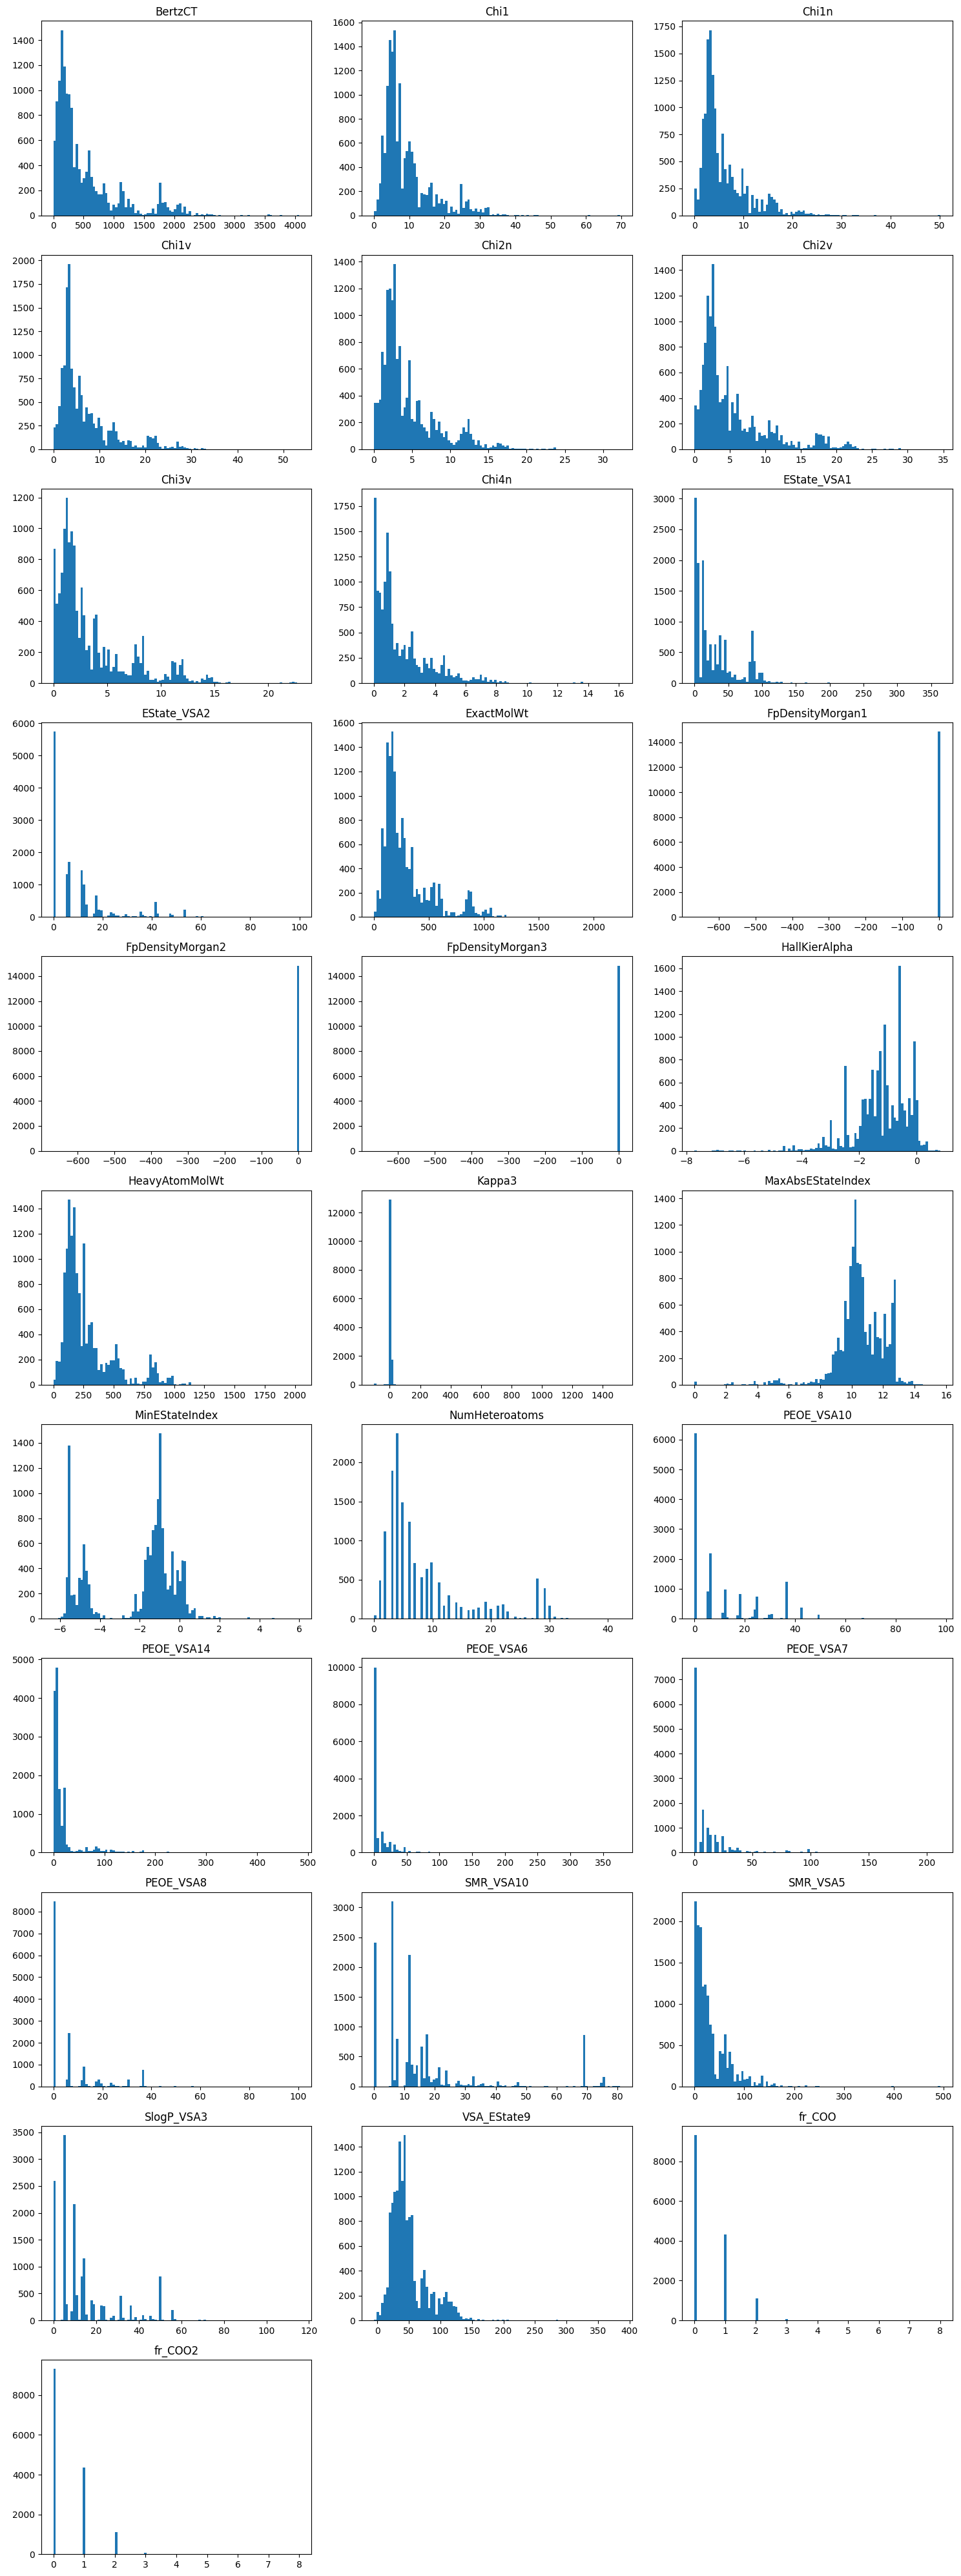

In [7]:
import matplotlib.pyplot as plt

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 40))

for i, col in enumerate(num_cols):
    ax = axes[i // n_cols, i % n_cols]  # Access the appropriate subplot
    ax.hist(df_train[col], bins=100)
    ax.set_title(col)

# Hide any unused subplots
for j in range(len(num_cols), n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

fig.tight_layout()

plt.show()


# Short descriptions
- 'BertzCT': Complexity
- 'Chi1': Topology
- 'Chi1n': Normalized Topology
- 'Chi1v': Valence Topology
- 'Chi2n': Normalized Branching
- 'Chi2v': Valence Branching
- 'Chi3v': Valence Branching
- 'Chi4n': Normalized Branching
- 'EState_VSA1': E-state Surface Area
- 'EState_VSA2': E-state Surface Area
- 'ExactMolWt': Molecular Weight
- 'FpDensityMorgan1': Fingerprint Density
- 'FpDensityMorgan2': Fingerprint Density
- 'FpDensityMorgan3': Fingerprint Density
- 'HallKierAlpha': Connectivity
- 'HeavyAtomMolWt': Heavy Atom Weight
- 'Kappa3': 3D Shape
- 'MaxAbsEStateIndex': Max E-state
- 'MinEStateIndex': Min E-state
- 'NumHeteroatoms': Heteroatoms Count
- 'PEOE_VSA10': Partial Charges Surface Area
- 'PEOE_VSA14': Partial Charges Surface Area
- 'PEOE_VSA6': Partial Charges Surface Area
- 'PEOE_VSA7': Partial Charges Surface Area
- 'PEOE_VSA8': Partial Charges Surface Area
- 'SMR_VSA10': SlogP Surface Area
- 'SMR_VSA5': SlogP Surface Area
- 'SlogP_VSA3': SlogP Surface Area
- 'VSA_EState9': E-state Surface Area
- 'fr_COO': Carboxyl Groups
- 'fr_COO2': Ketene-like Carbonyl Groups

And for the Enzyme Commission (EC) levels:

- EC1: Oxidoreductases
- EC2: Transferases
- EC3: Hydrolases
- EC4: Lyases
- EC5: Isomerases
- EC6: Ligases

# Long descriptions

- **BertzCT:** Bertz topological complexity index, quantifying the structural complexity of the molecule.
- **Chi1:** First Zagreb index, a topological descriptor based on the number of edges in the molecular graph.
- **Chi1n:** Normalized Chi1 index, variant accounting for the size of the molecule.
- **Chi1v:** Valence variant of the Chi1 index, considering atom valences.
- **Chi2n:** Normalized Chi2 index, a topological descriptor capturing molecular branching.
- **Chi2v:** Valence variant of the Chi2 index, accounting for atom valences.
- **Chi3v:** Valence variant of the Chi3 index, a topological descriptor related to molecular branching.
- **Chi4n:** Normalized Chi4 index, a topological descriptor characterizing molecular branching.
- **EState_VSA1:** E-state index-based descriptor related to the van der Waals surface area of the molecule.
- **EState_VSA2:** Another E-state index-based descriptor related to the van der Waals surface area.
- **ExactMolWt:** The exact molecular weight of the substrate.
- **FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3:** Fingerprints density of the substrate based on the Morgan algorithm, capturing structural information.
- **HallKierAlpha:** Hall-Kier alpha index, a molecular connectivity index related to chemical reactivity.
- **HeavyAtomMolWt:** The molecular weight of the heavy atoms in the substrate (excluding hydrogen atoms).
- **Kappa3:** The 3D shape index, characterizing the molecular shape.
- **MaxAbsEStateIndex:** Maximum absolute value of the E-state index, relating to the electrostatic potential of the molecule.
- **MinEStateIndex:** Minimum E-state index, related to the molecular electrostatic potential.
- **NumHeteroatoms:** The number of heteroatoms (non-carbon atoms) in the substrate.
- **PEOE_VSA10, PEOE_VSA14, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8:** Partial charges-based descriptors related to the potential surface area of the molecule.
- **SMR_VSA10, SMR_VSA5:** Solvent-accessible surface area descriptors based on the SlogP algorithm.
- **SlogP_VSA3:** SlogP-based descriptor related to the solvent-accessible surface area.
- **VSA_EState9:** E-state index-based descriptor capturing the van der Waals surface area.
- **fr_COO:** Number of carboxyl groups in the molecule.
- **fr_COO2:** Number of ketene-like carbonyl groups in the molecule.

These descriptors provide valuable information about the structural, topological, physical, and chemical properties of the substrates. 

**Enzyme Commission (EC) Classification System:**

In the context of enzymes, the Enzyme Commission (EC) classification system categorizes enzymes based on their catalyzed biochemical reactions. The system has six hierarchical levels:

1. **EC1: Oxidoreductases:** Enzymes catalyzing oxidation-reduction reactions, involving the transfer of electrons from one molecule (the reductant) to another (the oxidant).

2. **EC2: Transferases:** Enzymes catalyzing the transfer of functional groups (e.g., methyl, acetyl, phosphate) from one molecule to another.

3. **EC3: Hydrolases:** Enzymes catalyzing the hydrolysis (breaking down by adding water) of various types of bonds, such as ester, peptide, glycosidic, or phosphoric anhydride bonds.

4. **EC4: Lyases:** Enzymes catalyzing the removal of specific groups from a molecule or the addition of groups to form double bonds. They do not require hydrolysis or redox reactions.

5. **EC5: Isomerases:** Enzymes catalyzing the rearrangement of atoms within a molecule, resulting in isomeric forms (same molecular formula but different structural arrangement).

6. **EC6: Ligases:** Enzymes catalyzing the joining of two molecules using energy from ATP hydrolysis. They form new bonds, typically between larger molecules, often requiring energy input.

The EC classification system provides a standardized approach to describe and categorize enzymes based on their catalytic activities. It aids in organizing and understanding the diverse range of enzymes found in biological systems. Each enzyme is assigned a unique EC number representing its specific classification within the hierarchical levels. For example, lactate dehydrogenase is classified as EC1.1.1.27, indicating its membership in the oxidoreductases (EC1) and its role in catalyzing the specific reaction of oxidizing lactate to pyruvate.

In [10]:
na_counts = df_train.isna().sum()

print(na_counts)

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standardization to numerical columns
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Write the processed data to CSV files
df_train.to_csv('clean_data/train.csv', index=False)
df_test.to_csv('clean_data/test.csv', index=False)